<a href="https://colab.research.google.com/github/konucha/forcast-seismic/blob/main/forecasting_seismic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data
Download data on https://data.world/angga30prabu/seismic-indonesia-2015-2020

# Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Colab Notebooks/seismic/'

# Import Library

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Load the Data

In [5]:
data = pd.read_csv(path+"earthquakes.csv")
data.head()

,num,date,time,latitude,longitude,depth,magnitude,average
0,0,2/17/2019,22:40:40,-4.15,121.37019,10.0,4.53,7.265
1,1,2/17/2019,22:23:37,-0.22,124.47450,10.0,4.88,7.440
2,2,2/17/2019,21:27:04,-9.37,118.68642,13.4,4.15,8.775
3,3,2/17/2019,15:20:20,-1.05,127.41079,10.0,3.83,6.915
4,4,2/17/2019,13:51:36,0.62,122.36675,68.6,3.53,36.065


In [6]:
data.columns

Index(['num', 'date', 'time', 'latitude', 'longitude', 'depth', 'magnitude',
       'average'],
      dtype='object')

# Calculate mean of depth and magnitude every years

In [7]:
df = data[['date', 'depth', 'magnitude']]
df.head()

,date,depth,magnitude
0,2/17/2019,10.0,4.53
1,2/17/2019,10.0,4.88
2,2/17/2019,13.4,4.15
3,2/17/2019,10.0,3.83
4,2/17/2019,68.6,3.53


In [8]:
df.to_csv('./data.csv')

# Visualize the Data

In [9]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 23.4 MB/s 
     |████████████████████████████████| 16.7 MB 62.1 MB/s 
     |████████████████████████████████| 6.3 MB 70.2 MB/s 


In [10]:
import geopandas as gpd

df_geo = gpd.read_file((path+"/gadm36_IDN_1.json"))
display(df_geo.head())

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


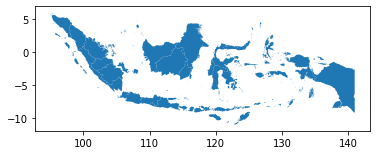

In [11]:
df_geo.plot()

In [12]:
# Using QGIS generate shp file

df_point = gpd.read_file(path+"earthquakes.shp")
display(df_point.head())

,num,date,time,latitude,longitude,depth,magnitude,geometry
0,0,2/17/2019,22:40:40,-4.15,121.37019,10.0,4.53,POINT (121.37019 -4.15000)
1,1,2/17/2019,22:23:37,-0.22,124.47450,10.0,4.88,POINT (124.47450 -0.22000)
2,2,2/17/2019,21:27:04,-9.37,118.68642,13.4,4.15,POINT (118.68642 -9.37000)
3,3,2/17/2019,15:20:20,-1.05,127.41079,10.0,3.83,POINT (127.41079 -1.05000)
4,4,2/17/2019,13:51:36,0.62,122.36675,68.6,3.53,POINT (122.36675 0.62000)


Text(0.5, 495.2361268712906, 'Longitude')

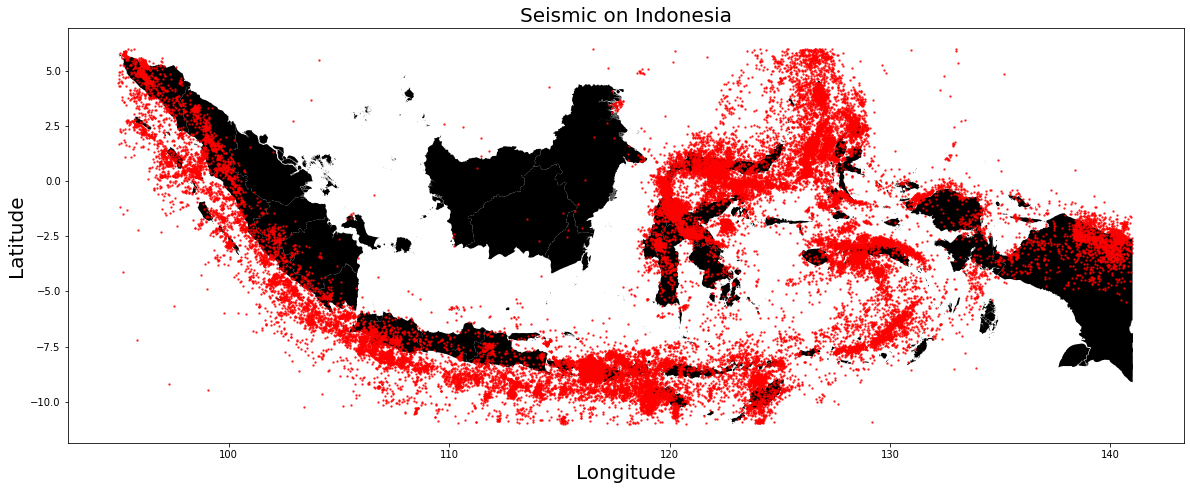

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
df_geo.plot(ax=ax, color='black')
df_point.plot(ax=ax, alpha=0.7, color='red', markersize=2)
ax.set_title('Seismic on Indonesia', fontdict = {'fontsize': 20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

# Create Utilities to Plotting

In [38]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(20, 10))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

# Iterate Data to Visualize

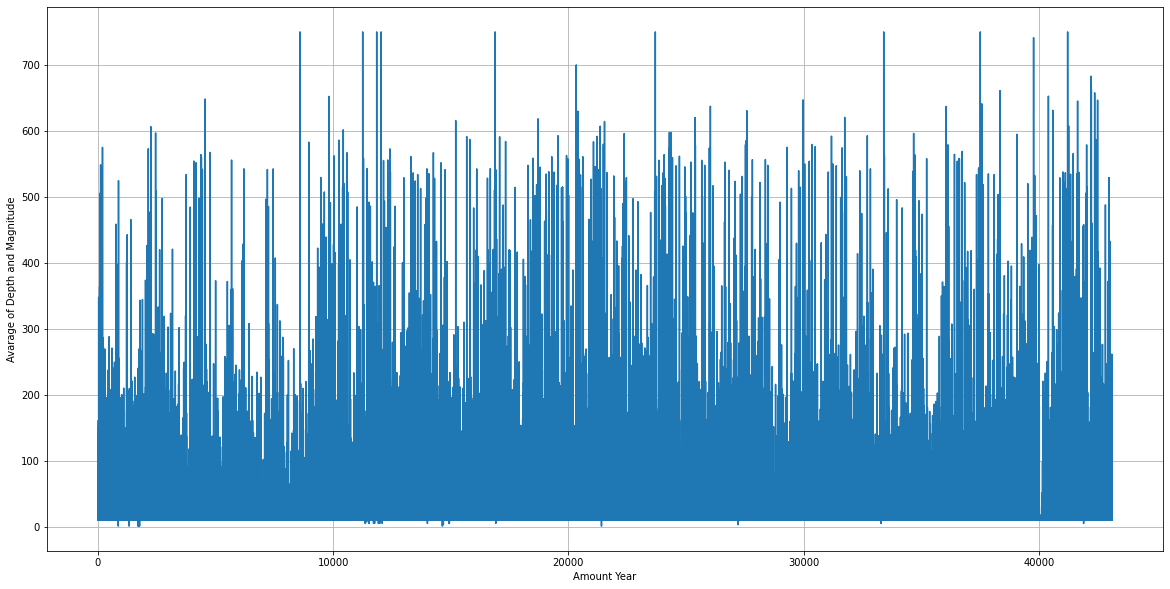

In [39]:
# Initialize lists
time_step = []
average = []

# Open CSV file
with open('./data.csv') as csvfile:
  
  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')
  
  # Skip the first line
  next(reader)
  
  # Append row and sunspot number to lists
  for row in reader:
    time_step.append(int(row[0]))
    average.append(float(row[2]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(average)

# Preview the data
plot_series(time, series, xlabel='Amount Year', ylabel='Avarage of Depth and Magnitude')

# Split the Data

In [16]:
# Define the split time
split_time = 42000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

# Prepare Features and Labels

In [17]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

# Declare Hyperparameter

In [18]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Build The Model

In [19]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 30, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 30)                990       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

# Tune Learning Rate

In [20]:
# Get initial weights
init_weights = model.get_weights()

In [21]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
1312/1312 [==============================] - 28s 9ms/step - loss: 37.1312 - lr: 1.0000e-08
Epoch 2/100
1312/1312 [==============================] - 12s 9ms/step - loss: 35.0628 - lr: 1.1220e-08
Epoch 3/100
1312/1312 [==============================] - 12s 9ms/step - loss: 34.5681 - lr: 1.2589e-08
Epoch 4/100
1312/1312 [==============================] - 13s 10ms/step - loss: 34.3201 - lr: 1.4125e-08
Epoch 5/100
1312/1312 [==============================] - 13s 10ms/step - loss: 34.1961 - lr: 1.5849e-08
Epoch 6/100
1312/1312 [==============================] - 12s 9ms/step - loss: 34.1264 - lr: 1.7783e-08
Epoch 7/100
1312/1312 [==============================] - 12s 9ms/step - loss: 34.0785 - lr: 1.9953e-08
Epoch 8/100
1312/1312 [==============================] - 12s 9ms/step - loss: 34.0429 - lr: 2.2387e-08
Epoch 9/100
1312/1312 [==============================] - 12s 9ms/step - loss: 34.0124 - lr: 2.5119e-08
Epoch 10/100
1312/1312 [==============================] - 12s 9ms/step 

# Visualize Learning Rate the Data

## Result Learning Rate the Data

(1e-08, 0.0001, 0.0, 100.0)

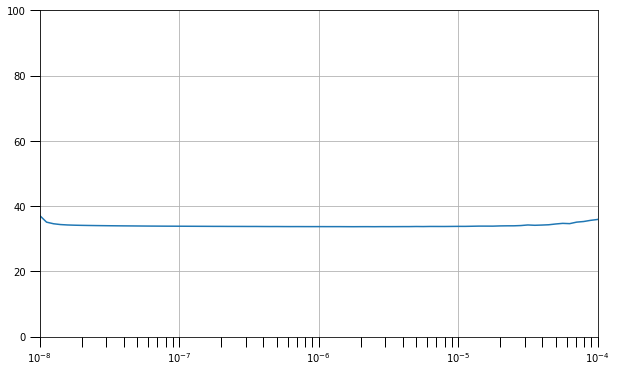

In [22]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-08, 1e-04, 0, 100])

## Zoom In Result Learning Rate the Data

(1e-08, 0.001, 0.0, 100.0)

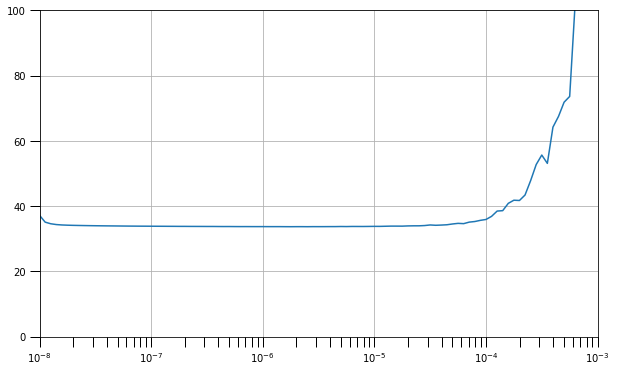

In [23]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-08, 1e-03, 0, 100])

# Traning The Model

In [24]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [25]:
# Set the learning rate
learning_rate = 8e-7

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [26]:
# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
1312/1312 [==============================] - 15s 10ms/step - loss: 33.9389 - mae: 34.4265
Epoch 2/100
1312/1312 [==============================] - 14s 10ms/step - loss: 33.7675 - mae: 34.2526
Epoch 3/100
1312/1312 [==============================] - 13s 9ms/step - loss: 33.7431 - mae: 34.2280
Epoch 4/100
1312/1312 [==============================] - 12s 9ms/step - loss: 33.7276 - mae: 34.2123
Epoch 5/100
1312/1312 [==============================] - 13s 10ms/step - loss: 33.7249 - mae: 34.2096
Epoch 6/100
1312/1312 [==============================] - 14s 10ms/step - loss: 33.7119 - mae: 34.1971
Epoch 7/100
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6992 - mae: 34.1828
Epoch 8/100
1312/1312 [==============================] - 13s 10ms/step - loss: 33.7025 - mae: 34.1860
Epoch 9/100
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6935 - mae: 34.1769
Epoch 10/100
1312/1312 [==============================] - 14s 11ms/step - loss: 33.6

# Visualize the Model

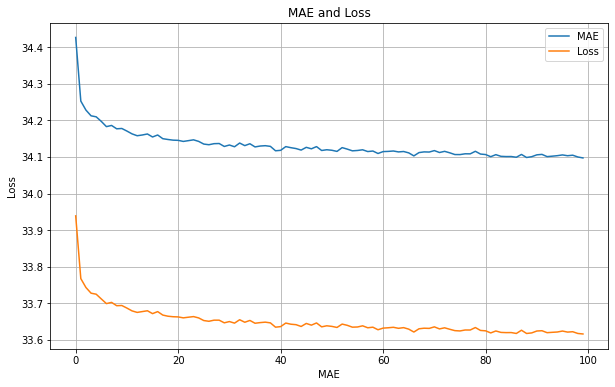

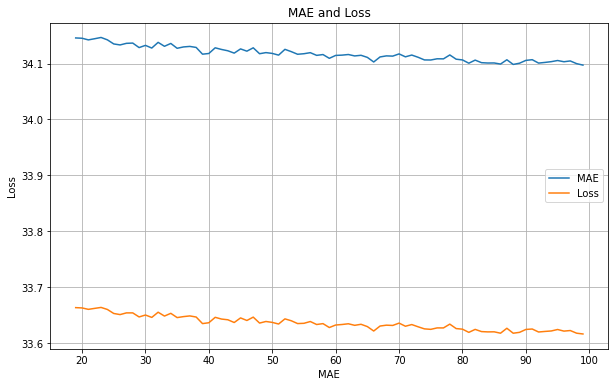

In [27]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Model Prediction

In [28]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

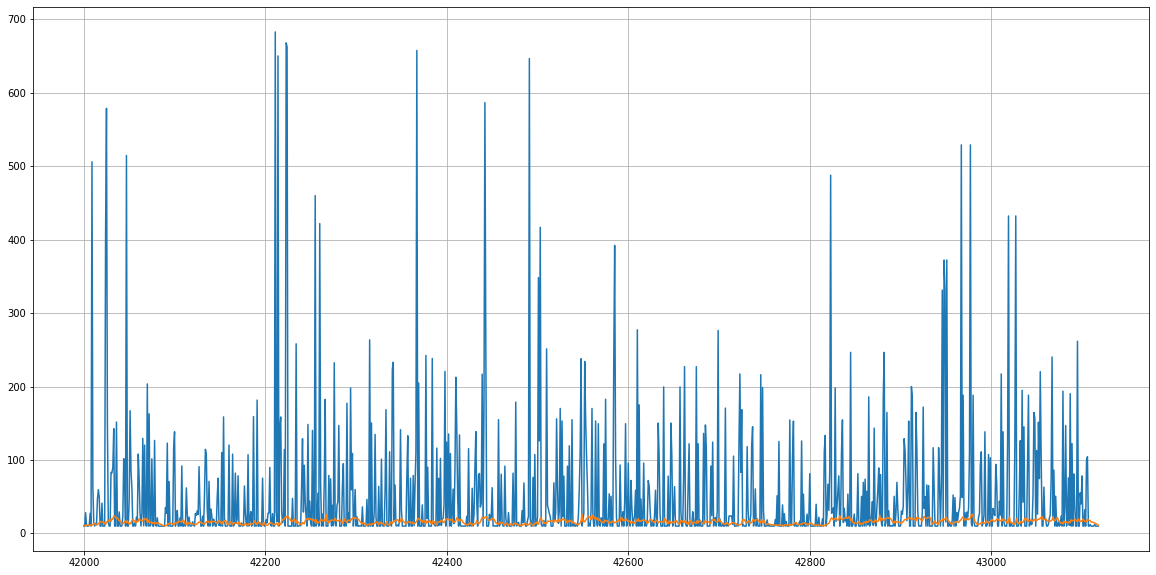

In [40]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

# Evaluate the MAE

https://stackoverflow.com/questions/56401346/mean-absolute-error-in-tensorflow-without-built-in-functions

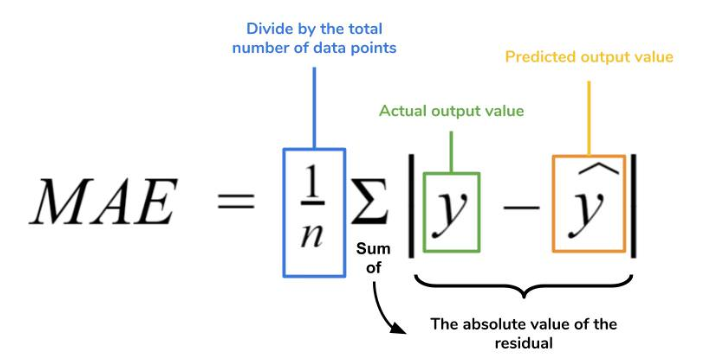

In [30]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

43.099895


In [31]:
print('Time prediction value')
time_valid

Time prediction value


array([42000, 42001, 42002, ..., 43116, 43117, 43118])

In [32]:
print('Actual value')
x_valid

Actual value


array([10. , 10. , 28.2, ..., 10. , 10. , 10. ])

In [33]:
print('Predicted value')
results

Predicted value


array([10.166564,  9.928559,  9.99507 , ..., 11.070596, 10.499303,
       10.186166], dtype=float32)

# Add Another Learning

In [34]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=10)

Epoch 1/10
1312/1312 [==============================] - 16s 10ms/step - loss: 33.6471 - mae: 34.1292
Epoch 2/10
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6426 - mae: 34.1243
Epoch 3/10
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6385 - mae: 34.1195
Epoch 4/10
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6363 - mae: 34.1171
Epoch 5/10
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6358 - mae: 34.1162
Epoch 6/10
1312/1312 [==============================] - 13s 9ms/step - loss: 33.6329 - mae: 34.1135
Epoch 7/10
1312/1312 [==============================] - 13s 9ms/step - loss: 33.6319 - mae: 34.1122
Epoch 8/10
1312/1312 [==============================] - 13s 9ms/step - loss: 33.6343 - mae: 34.1151
Epoch 9/10
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6332 - mae: 34.1138
Epoch 10/10
1312/1312 [==============================] - 14s 11ms/step - loss: 33.6316 - mae: 

In [35]:
# Set the initial learning rate
initial_learning_rate=1e-7

# Define the scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=400,
    decay_rate=0.96,
    staircase=True)

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=40)

Epoch 1/40
1312/1312 [==============================] - 16s 10ms/step - loss: 33.6342 - mae: 34.1152
Epoch 2/40
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6340 - mae: 34.1150
Epoch 3/40
1312/1312 [==============================] - 12s 9ms/step - loss: 33.6369 - mae: 34.1174
Epoch 4/40
1312/1312 [==============================] - 12s 9ms/step - loss: 33.6382 - mae: 34.1192
Epoch 5/40
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6407 - mae: 34.1221
Epoch 6/40
1312/1312 [==============================] - 14s 11ms/step - loss: 33.6401 - mae: 34.1218
Epoch 7/40
1312/1312 [==============================] - 13s 9ms/step - loss: 33.6429 - mae: 34.1250
Epoch 8/40
1312/1312 [==============================] - 12s 9ms/step - loss: 33.6448 - mae: 34.1273
Epoch 9/40
1312/1312 [==============================] - 13s 10ms/step - loss: 33.6463 - mae: 34.1289
Epoch 10/40
1312/1312 [==============================] - 13s 9ms/step - loss: 33.6478 - mae: 34

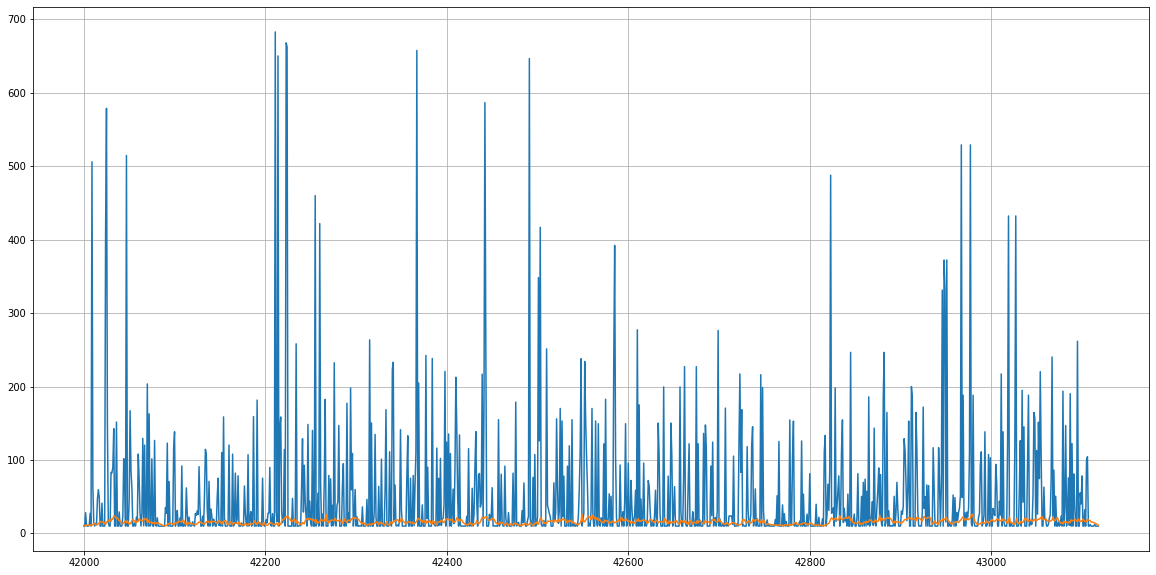

In [41]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [37]:
# Compute the MAE
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

43.180496

# Calculate Mean and Standard Deviation

## Import Library

In [65]:
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 7

## Save the Data

In [55]:
df = data[['date', 'average']]
df.head()
df.to_csv('./data_mean.csv')

## Convert Column Date to Date Type

In [58]:
#Parse strings to datetime type
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = df.set_index(['date'])
indexedDataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,average
date,
2019-02-17,7.265
2019-02-17,7.440
2019-02-17,8.775
2019-02-17,6.915
2019-02-17,36.065


## Visualize by Years

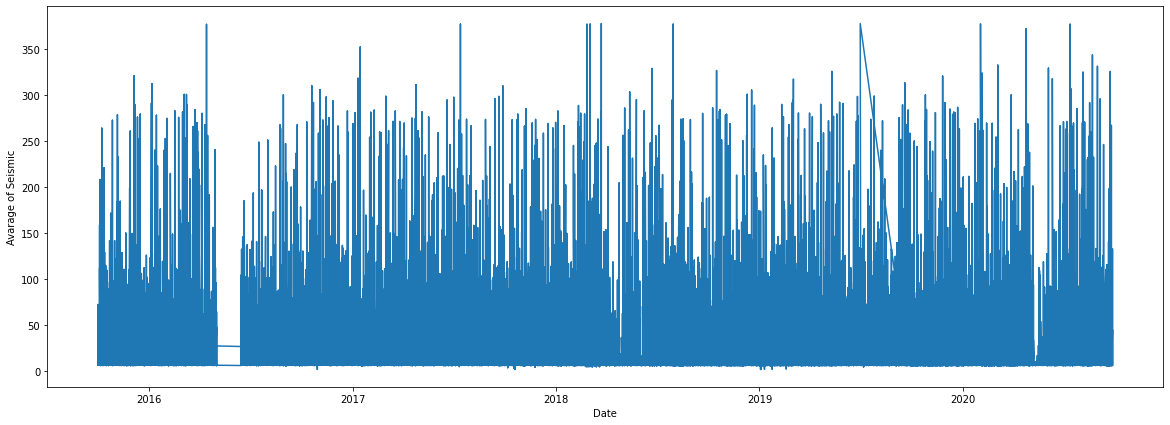

In [59]:
plt.xlabel('Date')
plt.ylabel('Avarage of Seismic')
plt.plot(indexedDataset)

## Calculate the Rolling Mean and Standard Deviation

In [61]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

              average
date                 
2019-02-17        NaN
2019-02-17        NaN
2019-02-17        NaN
2019-02-17        NaN
2019-02-17        NaN
...               ...
2020-09-26  15.332917
2020-09-26  14.375000
2020-09-26  14.398333
2020-09-26  10.681250
2020-09-26   6.753750

[43119 rows x 1 columns]               average
date                 
2019-02-17        NaN
2019-02-17        NaN
2019-02-17        NaN
2019-02-17        NaN
2019-02-17        NaN
...               ...
2020-09-26  17.708858
2020-09-26  17.863173
2020-09-26  17.852052
2020-09-26  13.536499
2020-09-26   0.369792

[43119 rows x 1 columns]


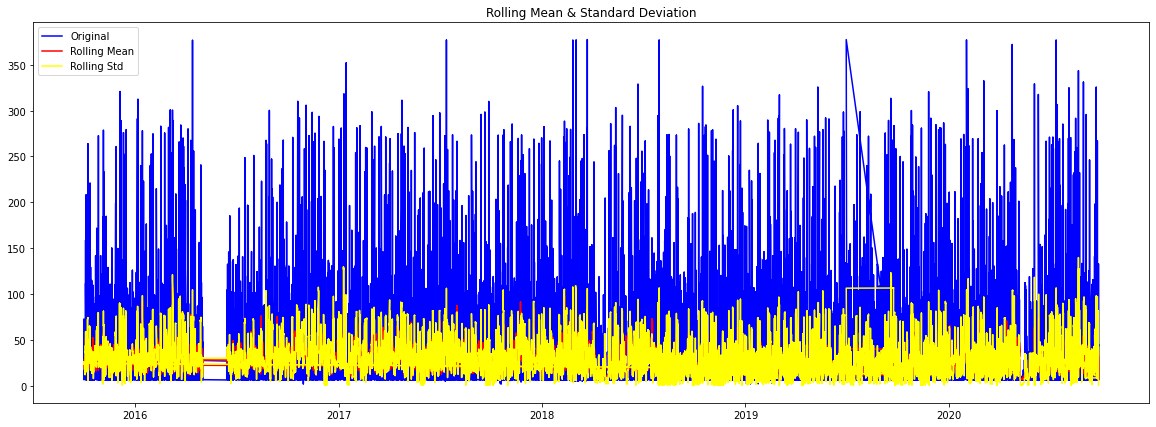

In [63]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='yellow', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [66]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['average'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.788289e+01
p-value                        2.997726e-30
#Lags Used                     5.500000e+01
Number of Observations Used    4.306300e+04
Critical Value (1%)           -3.430502e+00
Critical Value (5%)           -2.861607e+00
Critical Value (10%)          -2.566806e+00
dtype: float64


## Estimating Trend on Forecasting

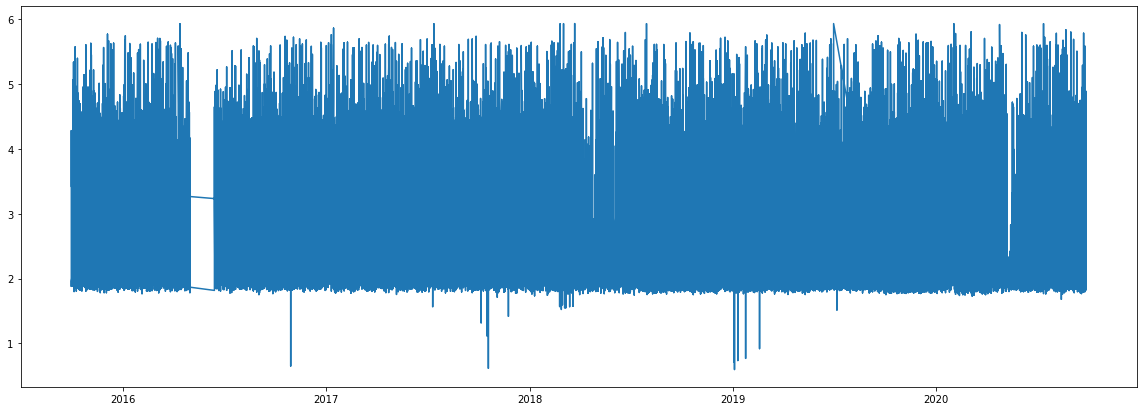

In [67]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

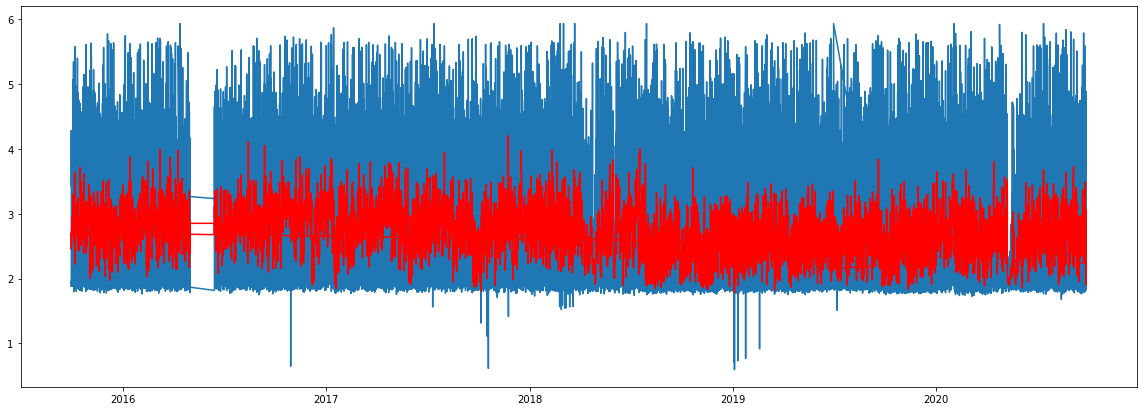

In [68]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

## Scale Minus Moving Average

In [69]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,average
date,
2019-02-16,-0.598571
2019-02-16,-0.409260
2019-02-16,-0.726359
2019-02-16,-0.438853
2019-02-16,0.403053
2019-02-16,0.492729
2019-02-16,-0.182573
2019-02-16,-0.503562
2019-02-16,-0.266115


## Test Stationary

In [73]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='yellow', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['average'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

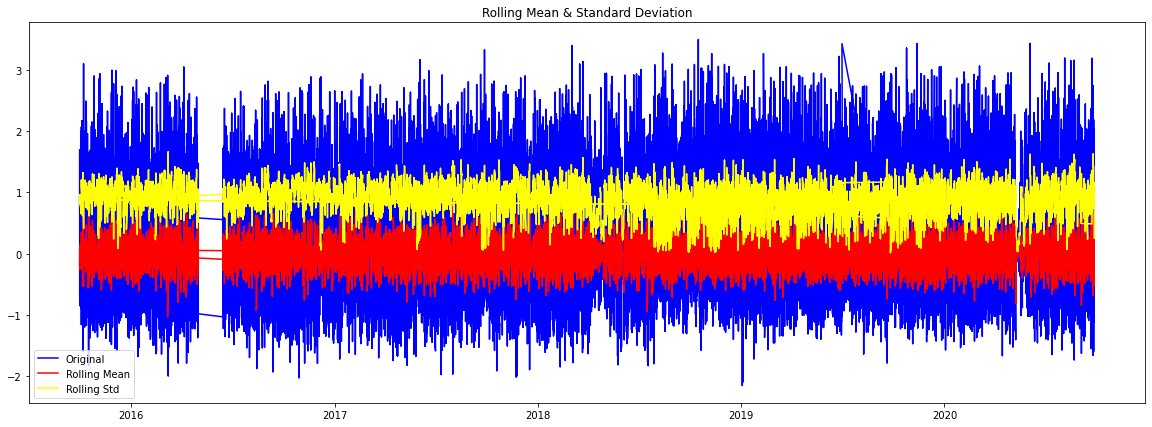

Results of Dickey Fuller Test:
Test Statistic                   -44.194749
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    43052.000000
Critical Value (1%)               -3.430502
Critical Value (5%)               -2.861607
Critical Value (10%)              -2.566806
dtype: float64


In [74]:
test_stationarity(datasetLogScaleMinusMovingAverage)